# Signature Time Series Clustering

In [24]:
# Native libraries
import os
import math

# # Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Algorithms
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from tqdm import tqdm
from numpy.random import default_rng
from tslearn.utils import to_time_series_dataset
import pickle

## Load time series data from CSV file

In [26]:
my_signatures = []
signature_names = []

series_directory = "/time_series_data/"
sign_ids = list(range(1, 56))
count_per_sign = 24

pbar = tqdm(total=len(sign_ids) * count_per_sign)
for i in sign_ids:
    for j in range(1, count_per_sign + 1):
        with open(f"time_series_data/{i}/{j}.csv") as f:
            line = f.readline()
            if line is not None:
                intensities = [int(y) for y in line.split(',')]
                signature_series = pd.DataFrame({
                    "intensity": intensities
                })
                signature_series.index.name = "x"
                my_signatures.append(signature_series)
                signature_names.append(f"signature_{i}_{j}")
        pbar.update(1)
pbar.close()

100%|██████████| 1320/1320 [00:01<00:00, 957.90it/s]


## Plot Df

In [28]:
cluster_num = 55
sample_size = 5 

In [29]:
tmp = []
selected_series = []
selected_series_names = []
rng = default_rng(1234)

for i in tqdm(range(cluster_num)):
    
    rints = rng.choice(a=range(i*count_per_sign, (i+1)*count_per_sign), size=sample_size, replace=False)
    for j in range(sample_size):
        tmp.append((my_signatures[rints[j]], signature_names[rints[j]]))

rng.shuffle(tmp, axis=0)

for i in range(cluster_num * sample_size):
    series, name = tmp[i]
    selected_series.append(series)
    selected_series_names.append(name)

100%|██████████| 55/55 [00:00<00:00, 27515.11it/s]


In [33]:
# for i in range(0, cluster_num * sample_size, sample_size):
#     fig, axs = plt.subplots(1, sample_size,figsize=(20, 5))
#     for j in range(sample_size):
#         axs[j].plot(selected_series[i+j].values)
#         axs[j].set_title(selected_series_names[i+j])
#     plt.show()

## Preprocessing

In [34]:
# check if the series have same length
series_lengths = {len(series) for series in selected_series}
print(series_lengths)

{640}


In [ ]:
selected_series_for_create_TS = []

In [37]:
for i in range(len(selected_series)):
    scaler = MinMaxScaler()
    selected_series[i] = MinMaxScaler().fit_transform(selected_series[i])
    selected_series[i]= selected_series[i].reshape(len(selected_series[i]))
    selected_series_for_create_TS.append(selected_series[i].tolist())

In [42]:
selected_series_TS = to_time_series_dataset(selected_series_for_create_TS)

In [43]:
print(selected_series_TS.shape)

(275, 640, 1)


In [44]:
len(selected_series)

275

## K-Mean Clustering 

In [45]:
cluster_count = 55

In [46]:
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(
    n_clusters=cluster_count,
    metric="dtw",
    verbose=True,
    n_jobs=4,
    random_state=1234
    )

km.fit(selected_series_TS)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 275 out of 275 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 1650 out of 1650 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parall

KeyboardInterrupt: 

In [ ]:
# model_file = open('kmean.model', 'wb')

# # Save Decision tree model
# pickle.dump(km, model_file)

# # Close file
# model_file.close()

Open model

In [ ]:
# model_file = open('kmean.model', 'rb')

# # Load your model
# km = pickle.load(model_file)

# # Close file
# model_file.close()

In [ ]:
labels = km.predict(selected_series_TS)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:   10.1s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:   12.7s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:   22.3s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:   26.3s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:   30.4s
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed:  

In [ ]:
clusterSignatureDict = {}

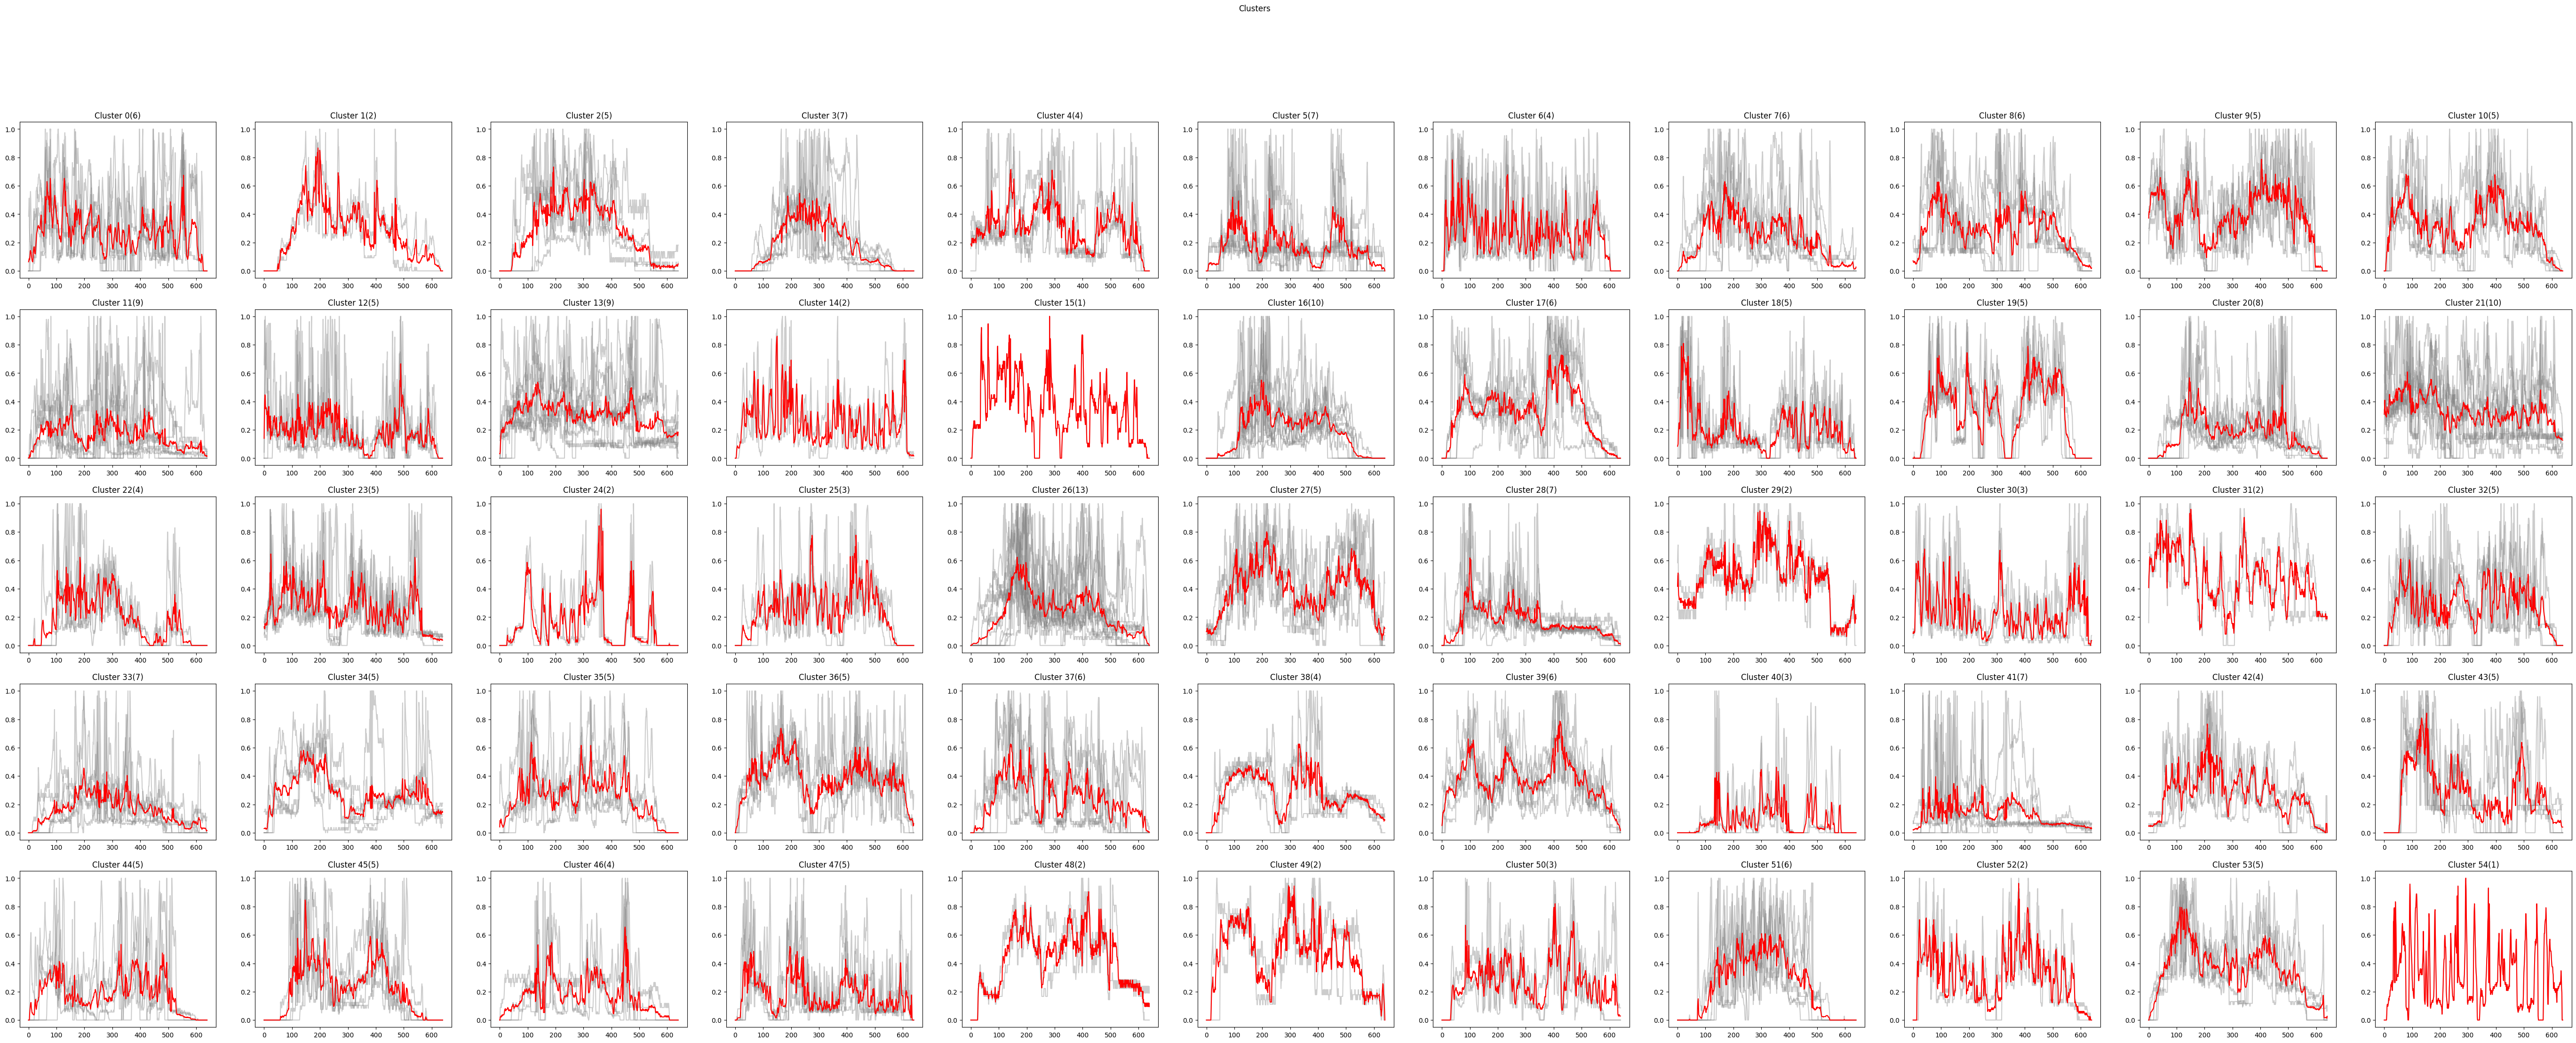

In [ ]:
fig, axs = plt.subplots(5, 11, figsize=(70,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that labels
for label in set(labels):
    cluster = []
    clusterSignature = []
    for i in range(len(labels)):
        if(labels[i]==label):
            axs[row_i, column_j].plot(selected_series[i],c="gray",alpha=0.4)
            cluster.append(selected_series[i])
            clusterSignature.append(i)

    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(cluster, axis=0),c="red")

    axs[row_i, column_j].set_title("Cluster "+str(row_i * 11 + column_j)+f"({len(cluster)})")
    column_j+=1
    if column_j% 11 == 0:
        row_i+=1
        column_j=0
    
    clusterSignatureDict[label] = clusterSignature

plt.show()

Plot Cluster

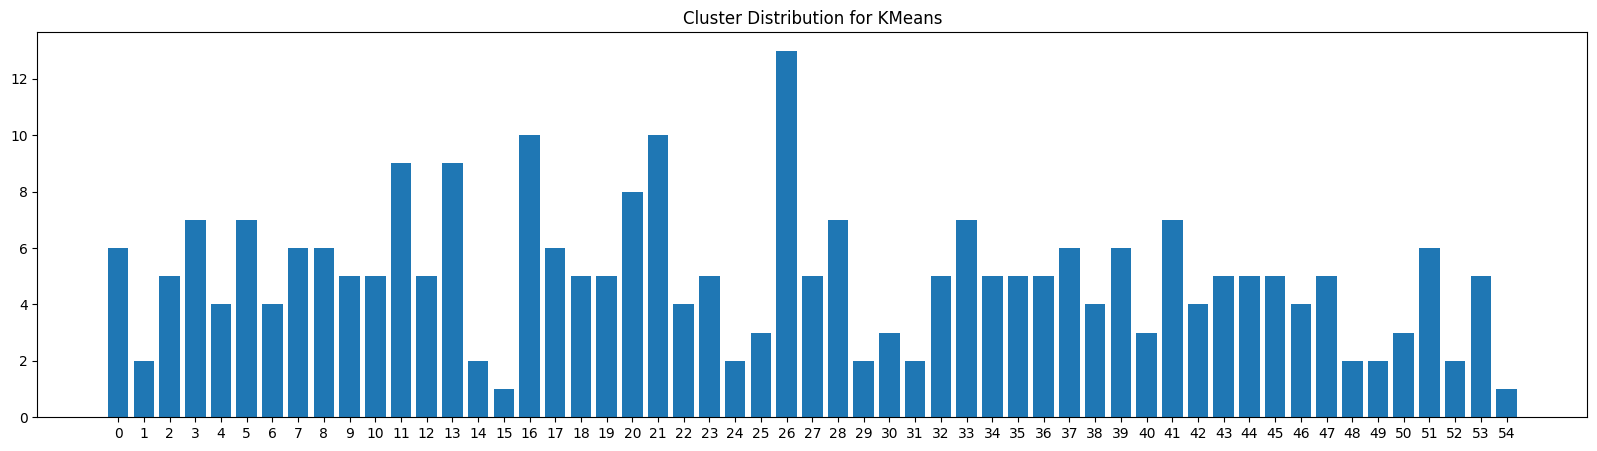

In [ ]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = [ str(i) for i in range(cluster_count)]
plt.figure(figsize=(20,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

## Visualize Series in each cluster

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
for k in range(55):
    idxs = []
    for j in range(len(labels)):
        if (labels[j]==k):
            idxs.append(j)
            
    columns_num = len(idxs)
    fig, axs = plt.subplots(1, columns_num, figsize=(8 * columns_num, 4))
    if len(idxs) == 1:
        axs.plot(selected_series[idxs[0]])
        axs.set_title(selected_series_names[idxs[0]])
    elif len(idxs) <= 0:
        print("something is wrong")
        continue
    else:
        for i, idx in enumerate(idxs):
            axs[i].plot(selected_series[idx])
            axs[i].set_title(selected_series_names[idx])
    fig.suptitle('Cluster-' + str(k))
    plt.savefig(f'clusters/cluster-{k}.png')
    plt.close()

## Calculate Error rate

In [ ]:
def majorityVote(signatureGroup):
    majorityDict = {}
    for value in signatureGroup:
        if value in majorityDict:
            majorityDict[value] += 1    
        else:
            majorityDict[value] = 1
    mx = max(majorityDict, key= lambda x: majorityDict[x])
    return mx, majorityDict[mx]

In [ ]:
errorCount = 0 

In [ ]:
majorityGroupDict = {}

In [ ]:
for index,value in clusterSignatureDict.items() :
    errorInThisCluster = 0
    signatureGroups = list(map(lambda i:selected_series_names[i].split("_")[1],value))
    if (len(signatureGroups) == 1):
        print(f"Cluster that have 1 is {index} and it's real signature group is {signatureGroups[0]}")
    majorityGroup, support = majorityVote(signatureGroups)
    for signatureGroup in signatureGroups:
        if signatureGroup != majorityGroup :
            errorInThisCluster += 1
    errorCount += errorInThisCluster
    print(f"Cluster {index} majority Group is {majorityGroup} has error {errorInThisCluster} from total {len(value)} which is {errorInThisCluster/len(value)*100} %")
    if majorityGroup not in majorityGroupDict:
        majorityGroupDict[majorityGroup] = []
    majorityGroupDict[majorityGroup].append((index,support))

Cluster 0 majority Group is 16 has error 1 from total 6 which is 16.666666666666664 %
Cluster 1 majority Group is 8 has error 1 from total 2 which is 50.0 %
Cluster 2 majority Group is 43 has error 3 from total 5 which is 60.0 %
Cluster 3 majority Group is 27 has error 4 from total 7 which is 57.14285714285714 %
Cluster 4 majority Group is 54 has error 0 from total 4 which is 0.0 %
Cluster 5 majority Group is 52 has error 2 from total 7 which is 28.57142857142857 %
Cluster 6 majority Group is 2 has error 0 from total 4 which is 0.0 %
Cluster 7 majority Group is 22 has error 3 from total 6 which is 50.0 %
Cluster 8 majority Group is 15 has error 1 from total 6 which is 16.666666666666664 %
Cluster 9 majority Group is 55 has error 0 from total 5 which is 0.0 %
Cluster 10 majority Group is 18 has error 2 from total 5 which is 40.0 %
Cluster 11 majority Group is 41 has error 6 from total 9 which is 66.66666666666666 %
Cluster 12 majority Group is 53 has error 0 from total 5 which is 0.0 %


In [ ]:
duplicatedMajority = [x[0] for x in majorityGroupDict.items() if len(x[1]) > 1]
print(duplicatedMajority)

['2', '18', '48', '9', '49', '30', '39']


In [ ]:
for majority in duplicatedMajority:
    maxValue = np.max([x[1] for x in majorityGroupDict[majority]])
    for value in majorityGroupDict[majority]:
        if value[1] != maxValue:
            errorCount += value[1]

In [ ]:
print(f"Error rate is {errorCount/len(selected_series)*100} %")

Error rate is 29.09090909090909 %
